In [1]:
import Zillow.data as zd
import warnings
warnings.filterwarnings("ignore")

train, validation, test = zd.get_preprocessed_data()

X_train, y_train = zd.split_x_y(train)
X_validation, y_validation = zd.split_x_y(validation)
X_test, y_test = zd.split_x_y(test)

In [19]:
%%time
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from Zillow.metrics import print_measure
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()
adaboost = AdaBoostRegressor(base_estimator=dt)

params = {
    'n_estimators': [x for x in range(10, 61, 10)],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [10, 20, 50],
    'base_estimator__max_leaf_nodes': [x for x in range(2, 21, 2)]
}

gscv = GridSearchCV(estimator = adaboost, 
                    return_train_score=True,
                    param_grid=params,
                    cv = 3,
                    scoring='neg_mean_absolute_error',
                    verbose=4,
                    n_jobs = -1)

gscv.fit(X_train,y_train)

print_measure(y_true=y_validation, y_pred=gscv.predict(X_validation))

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV 2/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=10;, score=(train=-0.073, test=-0.074) total time=   4.7s
[CV 1/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=40;, score=(train=-0.115, test=-0.115) total time=  17.0s
[CV 2/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=10;, score=(train=-0.072, test=-0.073) total time=   5.0s
[CV 3/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=20;, score=(train=-0.070, test=-0.070) total time=   9.2s
[CV 2/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=50;, score=(train=-0.072, test=-0.

[CV 3/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=10;, score=(train=-0.070, test=-0.070) total time=   5.0s
[CV 2/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=40;, score=(train=-0.072, test=-0.073) total time=  15.2s
[CV 1/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=10;, score=(train=-0.070, test=-0.070) total time=   4.8s
[CV 2/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=20;, score=(train=-0.072, test=-0.073) total time=   8.9s
[CV 1/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=50;, score=(train=-0.123, test=-0.123) total time=  20.2s
[CV 1/3] END base_estimator__max_leaf_no

[CV 2/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=30;, score=(train=-0.073, test=-0.073) total time=  13.6s
[CV 1/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=60;, score=(train=-0.126, test=-0.126) total time=  20.0s
[CV 3/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=40;, score=(train=-0.070, test=-0.069) total time=  11.0s
[CV 3/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=60;, score=(train=-0.070, test=-0.070) total time=  12.1s
[CV 3/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=30;, score=(train=-0.070, test=-0.070) total time=  14.0s
[CV 1/3] END base_estimator__max_leaf_n

[CV 1/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=30;, score=(train=-0.093, test=-0.092) total time=  12.1s
[CV 3/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=50;, score=(train=-0.070, test=-0.070) total time=  11.8s
[CV 1/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=20;, score=(train=-0.080, test=-0.080) total time=   9.0s
[CV 2/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=40;, score=(train=-0.072, test=-0.072) total time=  14.6s
[CV 1/3] END base_estimator__max_leaf_nodes=2, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=10;, score=(train=-0.070, test=-0.070) total time=   5.1s
[CV 3/3] END base_estimator__max_leaf_n

[CV 1/3] END base_estimator__max_leaf_nodes=4, base_estimator__min_samples_leaf=50, base_estimator__min_samples_split=5, n_estimators=40;, score=(train=-0.156, test=-0.155) total time=  23.7s
[CV 1/3] END base_estimator__max_leaf_nodes=4, base_estimator__min_samples_leaf=50, base_estimator__min_samples_split=10, n_estimators=10;, score=(train=-0.094, test=-0.094) total time=   7.2s
[CV 1/3] END base_estimator__max_leaf_nodes=4, base_estimator__min_samples_leaf=50, base_estimator__min_samples_split=10, n_estimators=20;, score=(train=-0.123, test=-0.123) total time=  12.9s
[CV 2/3] END base_estimator__max_leaf_nodes=4, base_estimator__min_samples_leaf=50, base_estimator__min_samples_split=10, n_estimators=40;, score=(train=-0.127, test=-0.127) total time=  25.8s
[CV 2/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=10;, score=(train=-0.073, test=-0.074) total time=   8.0s
[CV 3/3] END base_estimator__max_leaf

[CV 1/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=60;, score=(train=-0.121, test=-0.120) total time=  30.8s
[CV 3/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=30;, score=(train=-0.110, test=-0.109) total time=  19.3s
[CV 2/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=60;, score=(train=-0.152, test=-0.152) total time=  42.0s
[CV 1/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=50;, score=(train=-0.144, test=-0.142) total time=  32.1s
[CV 1/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=20;, score=(train=-0.097, test=-0.097) total time=  12.8s
[CV 1/3] END base_estimator__max_leaf_n

[CV 1/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=40;, score=(train=-0.118, test=-0.118) total time=  25.7s
[CV 3/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=60;, score=(train=-0.156, test=-0.155) total time=  37.6s
[CV 3/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=50;, score=(train=-0.144, test=-0.143) total time=  29.2s
[CV 3/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=20;, score=(train=-0.093, test=-0.092) total time=  12.7s
[CV 3/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=40;, score=(train=-0.143, test=-0.143) total time=  25.8s
[CV 2/3] END base_estimator__max_leaf_n

[CV 1/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=40;, score=(train=-0.122, test=-0.121) total time=  26.4s
[CV 3/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=60;, score=(train=-0.167, test=-0.166) total time=  36.5s
[CV 2/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=50;, score=(train=-0.143, test=-0.143) total time=  30.7s
[CV 3/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=20;, score=(train=-0.099, test=-0.098) total time=  14.2s
[CV 3/3] END base_estimator__max_leaf_nodes=6, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=40;, score=(train=-0.132, test=-0.131) total time=  27.1s
[CV 1/3] END base_estimator__max_leaf_

[CV 3/3] END base_estimator__max_leaf_nodes=8, base_estimator__min_samples_leaf=50, base_estimator__min_samples_split=10, n_estimators=60;, score=(train=-0.152, test=-0.151) total time=  44.0s
[CV 3/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=50;, score=(train=-0.159, test=-0.158) total time=  36.9s
[CV 3/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=20;, score=(train=-0.099, test=-0.098) total time=  14.8s
[CV 3/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=40;, score=(train=-0.135, test=-0.134) total time=  27.4s
[CV 1/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=10;, score=(train=-0.079, test=-0.079) total time=   8.3s
[CV 3/3] END base_estimator__max_l

[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=60;, score=(train=-0.218, test=-0.221) total time=  47.0s
[CV 1/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=50;, score=(train=-0.181, test=-0.181) total time=  36.6s
[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=20;, score=(train=-0.084, test=-0.085) total time=  19.0s
[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=40;, score=(train=-0.160, test=-0.162) total time=  35.2s
[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=5, n_estimators=10;, score=(train=-0.077, test=-0.078) total time=   9.8s
[CV 2/3] END base_estimator__max_l

[CV 1/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=30;, score=(train=-0.150, test=-0.150) total time=  22.6s
[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=50;, score=(train=-0.200, test=-0.203) total time=  37.6s
[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=30;, score=(train=-0.151, test=-0.154) total time=  24.7s
[CV 1/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=60;, score=(train=-0.214, test=-0.212) total time=  43.2s
[CV 3/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=30;, score=(train=-0.118, test=-0.117) total time=  23.7s
[CV 2/3] END base_estimator__max_

[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=10;, score=(train=-0.075, test=-0.076) total time=   8.6s
[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=20;, score=(train=-0.092, test=-0.093) total time=  16.9s
[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=40;, score=(train=-0.158, test=-0.160) total time=  32.2s
[CV 2/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=10;, score=(train=-0.083, test=-0.084) total time=   9.9s
[CV 1/3] END base_estimator__max_leaf_nodes=10, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=20;, score=(train=-0.105, test=-0.105) total time=  17.4s
[CV 1/3] END base_estimator__max

[CV 1/3] END base_estimator__max_leaf_nodes=12, base_estimator__min_samples_leaf=50, base_estimator__min_samples_split=10, n_estimators=50;, score=(train=-0.233, test=-0.231) total time=  39.7s
[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=10;, score=(train=-0.074, test=-0.074) total time=  10.9s
[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=20;, score=(train=-0.108, test=-0.108) total time=  18.9s
[CV 1/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=50;, score=(train=-0.243, test=-0.241) total time=  41.1s
[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=10;, score=(train=-0.075, test=-0.074) total time=  10.8s
[CV 1/3] END base_estimator__max_l

[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=60;, score=(train=-0.211, test=-0.210) total time=  51.0s
[CV 2/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=50;, score=(train=-0.235, test=-0.238) total time=  44.6s
[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=20;, score=(train=-0.104, test=-0.104) total time=  20.4s
[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=40;, score=(train=-0.177, test=-0.176) total time=  38.2s
[CV 2/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=5, n_estimators=10;, score=(train=-0.084, test=-0.085) total time=  10.2s
[CV 2/3] END base_estimator__max_l

[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=30;, score=(train=-0.151, test=-0.150) total time=  26.0s
[CV 2/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=10, n_estimators=60;, score=(train=-0.266, test=-0.269) total time=  54.4s
[CV 1/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=50;, score=(train=-0.271, test=-0.268) total time=  43.1s
[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=5, n_estimators=10;, score=(train=-0.079, test=-0.079) total time=   9.8s
[CV 2/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=5, n_estimators=30;, score=(train=-0.167, test=-0.170) total time=  28.3s
[CV 1/3] END base_estimator__max_

[CV 1/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=30;, score=(train=-0.169, test=-0.169) total time=  26.2s
[CV 3/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=2, n_estimators=50;, score=(train=-0.219, test=-0.218) total time=  44.0s
[CV 1/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=5, n_estimators=30;, score=(train=-0.149, test=-0.149) total time=  27.0s
[CV 2/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=5, n_estimators=50;, score=(train=-0.195, test=-0.198) total time=  44.9s
[CV 1/3] END base_estimator__max_leaf_nodes=14, base_estimator__min_samples_leaf=20, base_estimator__min_samples_split=10, n_estimators=30;, score=(train=-0.175, test=-0.174) total time=  27.8s
[CV 3/3] END base_estimator__max_l

[CV 1/3] END base_estimator__max_leaf_nodes=18, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=10;, score=(train=-0.075, test=-0.075) total time=  10.0s
[CV 3/3] END base_estimator__max_leaf_nodes=18, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=10;, score=(train=-0.083, test=-0.082) total time=  11.3s
[CV 1/3] END base_estimator__max_leaf_nodes=18, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=30;, score=(train=-0.218, test=-0.216) total time=  25.4s
[CV 3/3] END base_estimator__max_leaf_nodes=18, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=2, n_estimators=50;, score=(train=-0.232, test=-0.232) total time=  43.1s
[CV 2/3] END base_estimator__max_leaf_nodes=18, base_estimator__min_samples_leaf=10, base_estimator__min_samples_split=5, n_estimators=30;, score=(train=-0.158, test=-0.161) total time=  27.9s
[CV 1/3] END base_estimator__max_le

Mean absolute error: 0.07278
 Mean squared error: 0.03475
           R2 score: -0.15612
CPU times: user 11.2 s, sys: 2.35 s, total: 13.6 s
Wall time: 1h 32min 4s


In [39]:
gscv.best_params_

{'base_estimator__max_leaf_nodes': 2,
 'base_estimator__min_samples_leaf': 10,
 'base_estimator__min_samples_split': 5,
 'n_estimators': 10}

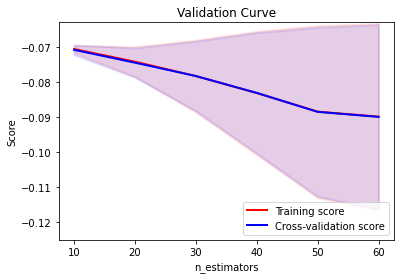

In [29]:
import Zillow.visualization as zv

zv.plot_grid_search_validation_curve(gscv, 'n_estimators', ylim=(-.125,-.063))

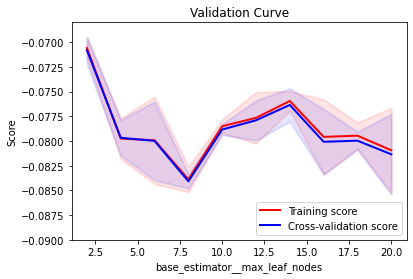

In [26]:
zv.plot_grid_search_validation_curve(gscv, 'base_estimator__max_leaf_nodes', ylim=(-.09,-.068))

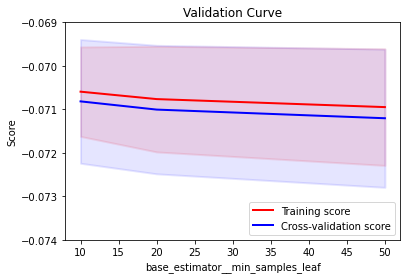

In [35]:
zv.plot_grid_search_validation_curve(gscv, 'base_estimator__min_samples_leaf', ylim=(-.074,-.069))

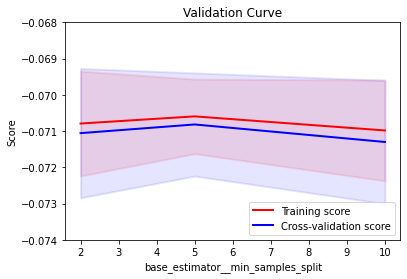

In [40]:
zv.plot_grid_search_validation_curve(gscv, 'base_estimator__min_samples_split', ylim=(-.074,-.068))

In [43]:
import pandas as pd

train, validation, test = zd.get_preprocessed_data()
train = pd.concat([train, validation], axis=0, ignore_index=True)

X_train, y_train = zd.split_x_y(train)
X_test, y_test = zd.split_x_y(test)

dt = DecisionTreeRegressor(max_leaf_nodes=2,
                           min_samples_leaf=10,
                           min_samples_split=5)

adaboost = AdaBoostRegressor(base_estimator=dt, n_estimators=10)

adaboost.fit(X_train,y_train)

print_measure(y_true=y_test, y_pred=adaboost.predict(X_test))

Mean absolute error: 0.07091
 Mean squared error: 0.03076
           R2 score: -0.07510
